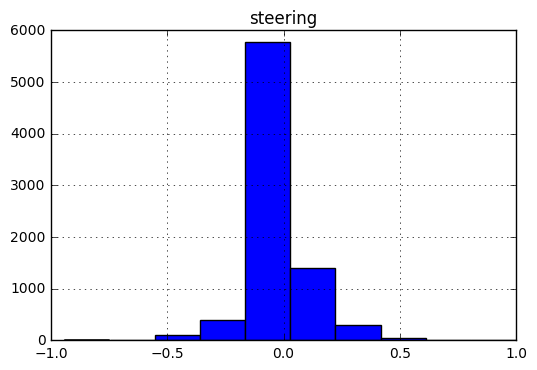

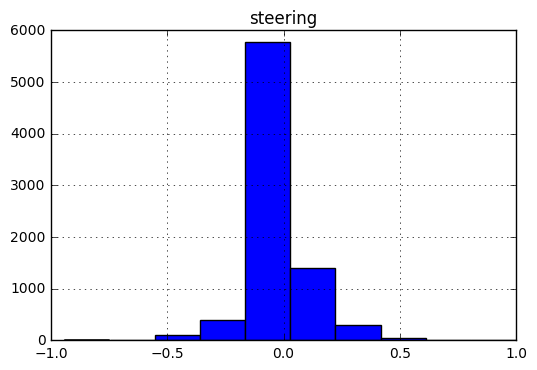

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv('data/driving_log.csv', usecols=[0,1,2,3])
data_frame.hist(column='steering')

plt.show()

In [84]:
import cv2
from keras.preprocessing.image import img_to_array, load_img

def left_and_right(row):
    
    camera = 'left'

    #Load the specified image
    orig_image = cv2.imread("./data/" + row[camera].strip())

    # flip the image
    flipped_image = cv2.flip(orig_image, 1)

    # Resize modified image to 64x64 to get out final image
    #final_orig_image = cv2.resize(orig_image, (64,64,3))
    #final_flipped_image = cv2.resize(flipped_image, (64,64,3))
    
    return orig_image, flipped_image


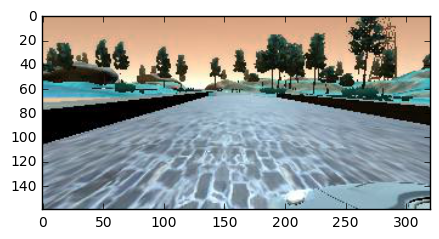

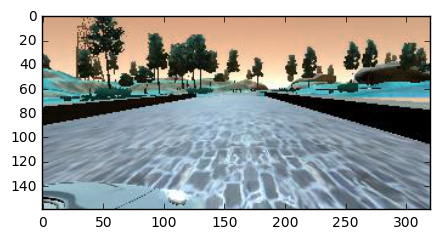

In [85]:
data_frame = pd.read_csv('./data/driving_log.csv', usecols=[0, 1, 2, 3])
left_image, right_image = left_and_right(data_frame.loc[0]) #0 can be replaced by any value within range

plt.figure(figsize=(5,5))
plt.imshow(left_image)
plt.figure(figsize=(5,5))
plt.imshow(right_image)
plt.show()

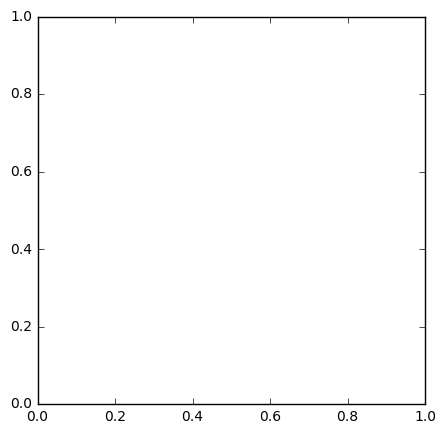

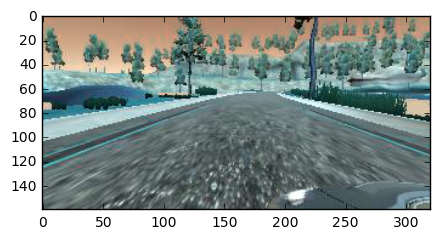

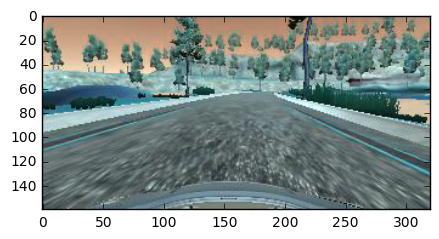

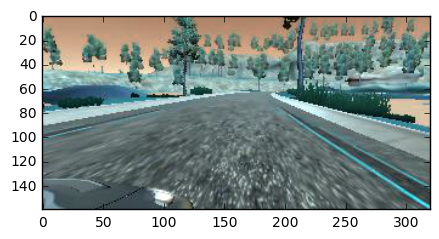

In [75]:
import cv2
from keras.preprocessing.image import img_to_array, load_img

def left_center_right(row):
    
    #Load the 3 images
    left_image = cv2.imread("./data/" + row['left'].strip())
    center_image = cv2.imread("./data/" + row['center'].strip())
    right_image = cv2.imread("./data/" + row['right'].strip())

  
    return left_image, center_image, right_image


data_frame = pd.read_csv('./data/driving_log.csv', usecols=[0, 1, 2, 3])
left_image, center_image, right_image = left_center_right(data_frame.loc[1000]) #1000 can be replaced by any value within range

plt.figure(figsize=(5,5))
plt.imshow(left_image)
plt.figure(figsize=(5,5))
plt.imshow(center_image)
plt.figure(figsize=(5,5))
plt.imshow(right_image)
plt.show()

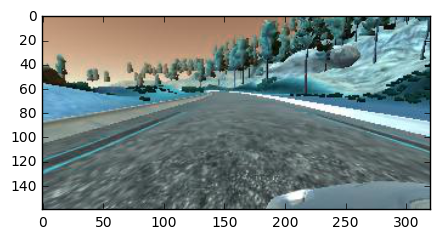

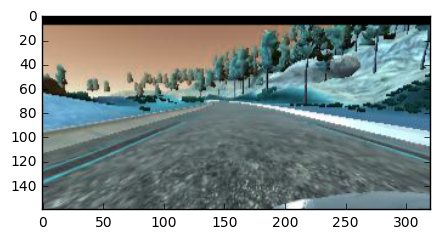

In [80]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array, load_img

def get_single_image(row):
    camera = 'left'

    #Load the specified image
    single_image = cv2.imread("./data/" + row[camera].strip())

    return single_image

def trans_image(image, trans_range=0.004):
 
    tr_x = trans_range*np.random.uniform()-trans_range/2
    # Apply some randomness to the image itself (using 40 as above
    tr_y = 40*np.random.uniform()-40/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(image.shape[1],image.shape[0]))
    
    # Return the modified image and steering angle
    return image_tr

data_frame = pd.read_csv('./data/driving_log.csv', usecols=[0, 1, 2, 3])
single_image = get_single_image(data_frame.loc[5000]) #5000 can be replaced by any value within range

trans_image = trans_image(single_image)

plt.figure(figsize=(5,5))
plt.imshow(single_image)
plt.figure(figsize=(5,5))
plt.imshow(trans_image)
plt.show()

